In [36]:
import getpass
import datetime
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import os
import csv
import pandas as pd

# import mplcursors

USER = getpass.getuser()

In [37]:
plt.rcParams['figure.figsize'] = [8, 5]
%matplotlib notebook

In [88]:
data_dir = pd.read_excel (r"temp_data.xlsx")

df = pd.DataFrame(data_dir)
dn = df.to_numpy()
exmatrix = np.matrix(dn)
                     
rf_list = []
zynq_list = []
batt_list = []

for x in range(0,187):
    s1 = (exmatrix[x,5].hour * 60 + exmatrix[x,5].minute) * 60 + exmatrix[x,5].second
    s2 = (exmatrix[(x+1),5].hour * 60 + exmatrix[(x+1),5].minute) * 60 + exmatrix[(x+1),5].second
    dt = s2-s1
    
    down_point_rf = exmatrix[x,6]
    down_point_zynq = exmatrix[x,7]
    down_point_batt = exmatrix[x,8]

    up_point_rf = exmatrix[(x+1),6]
    up_point_zynq = exmatrix[(x+1),7]
    up_point_batt = exmatrix[(x+1),8]

    p_dif_rf = up_point_rf - down_point_rf
    p_dif_zynq = up_point_zynq - down_point_zynq
    p_dif_batt = up_point_batt - down_point_batt

    rf_int = p_dif_rf/dt
    zynq_int = p_dif_zynq/dt
    batt_int = p_dif_batt/dt
    
    upsample_array_rf = []
    upsample_array_zynq = []
    upsample_array_batt = []
    for y in range(0,dt):
        rf_inc = down_point_rf + y*rf_int
        zynq_inc = down_point_zynq + y*zynq_int
        batt_inc = down_point_batt + y*batt_int
        
        upsample_array_rf.append(rf_inc)
        upsample_array_zynq.append(zynq_inc)
        upsample_array_batt.append(batt_inc)
      
    rf_list = rf_list + upsample_array_rf
    zynq_list = zynq_list + upsample_array_zynq
    batt_list = batt_list + upsample_array_batt

rf_therm_list = []
batt_therm_list = []
amb_in_list = []
amb_out_list = []

for x in range(0,293):
    s1 = (exmatrix[x,0].hour * 60 + exmatrix[x,0].minute) * 60 + exmatrix[x,0].second
    s2 = (exmatrix[(x+1),0].hour * 60 + exmatrix[(x+1),0].minute) * 60 + exmatrix[(x+1),0].second
    dt = s2-s1
    
    down_point_rf = exmatrix[x,1]
    down_point_batt = exmatrix[x,2]
    down_point_amb_in = exmatrix[x,3]
    down_point_amb_out = exmatrix[x,4]

    up_point_rf = exmatrix[(x+1),1]
    up_point_batt = exmatrix[(x+1),2]
    up_point_amb_in = exmatrix[(x+1),3]
    up_point_amb_out = exmatrix[(x+1),4]

    p_dif_rf = up_point_rf - down_point_rf
    p_dif_batt = up_point_batt - down_point_batt
    p_dif_amb_in = up_point_amb_in - down_point_amb_in
    p_dif_amb_out = up_point_amb_out - down_point_amb_out

    rf_int = p_dif_rf/dt
    batt_int = p_dif_batt/dt
    amb_in_int = p_dif_amb_in/dt
    amb_out_int = p_dif_amb_out/dt
    
    upsample_array_rf = []
    upsample_array_batt = []
    upsample_array_amb_in = []
    upsample_array_amb_out = []
    for y in range(0,dt):
        rf_inc = down_point_rf + y*rf_int
        batt_inc = down_point_batt + y*batt_int
        amb_in_inc = down_point_amb_in + y*amb_in_int
        amb_out_inc = down_point_amb_out + y*amb_out_int
        
        upsample_array_rf.append(rf_inc)
        upsample_array_batt.append(batt_inc)
        upsample_array_amb_in.append(amb_in_inc)
        upsample_array_amb_out.append(amb_out_inc)
      
    rf_therm_list = rf_therm_list + upsample_array_rf
    batt_therm_list = batt_therm_list + upsample_array_batt
    amb_in_list = amb_in_list + upsample_array_amb_in
    amb_out_list = amb_out_list + upsample_array_amb_out
    


<IPython.core.display.Javascript object>


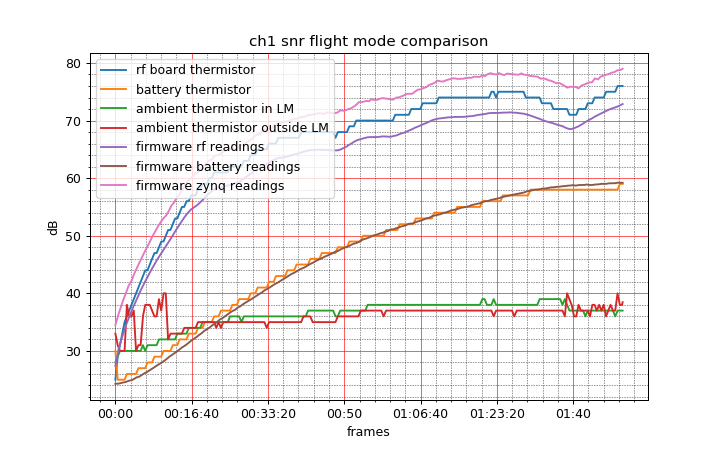

In [100]:
rf_therm_list = np.matrix(rf_therm_list)
batt_therm_list = np.matrix(batt_therm_list)
amb_in_list = np.matrix(amb_in_list)
amb_out_list = np.matrix(amb_out_list)

rf_list = np.matrix(rf_list)
batt_list = np.matrix(batt_list)
zynq_list = np.matrix(zynq_list)

time_axis = pd.read_excel(r"temp_data.xlsx", index_col=None, na_values=['NA'], usecols = "J", nrows = 6650)
# print(type(time_axis[0,0]))
# time_axis = datetime.datetime.strftime(time_axis)
# time_axis = dates.date2num(list(time_axis))
# print(np.shape(time_axis))
# print(time_axis) 
# print(type(time_axis))    
fig, ax = plt.subplots()

plt.plot(time_axis, rf_therm_list[0,0:6650].mean(0).T, label="rf board thermistor")
plt.plot(time_axis, batt_therm_list[0,0:6650].mean(0).T, label="battery thermistor")
plt.plot(time_axis, amb_in_list[0,0:6650].mean(0).T, label="ambient thermistor in LM")
plt.plot(time_axis, amb_out_list[0,0:6650].mean(0).T, label="ambient thermistor outside LM")
plt.plot(time_axis, rf_list[0,0:6650].mean(0).T, label="firmware rf readings")
plt.plot(time_axis, batt_list[0,0:6650].mean(0).T, label="firmware battery readings")
plt.plot(time_axis, zynq_list[0,0:6650].mean(0).T, label="firmware zynq readings")
# plt.plot(batt_therm_list[0,0:6605].mean(0).T, label="ch 1 mean")
# plt.plot(amb_in_therm_list[0,0:6605].mean(0).T, label="ch 1 mean")
# plt.plot(amb_out_therm_list[0,0:6605].mean(0).T, label="ch 1 mean")

plt.ylabel('dB')
plt.xlabel('frames')
#plt.ylim(110,125)
plt.title('ch1 snr flight mode comparison') 
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.legend()
# plt.savefig("ch1 snr flight mode comparison")


In [66]:
a = np.arange(np.timedelta64('00:00:00'), np.timedelta64('00:00:10'))
print(a)

ValueError: Could not convert object to NumPy timedelta

In [103]:
print(np.shape(rf_therm_list))
print(np.shape(rf_list))


(1, 8805)
(1, 6650)
